In [36]:
# import
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [24]:
# train data
train = pd.read_csv("data/train.csv")
print(train.size)
train.head(5).T

267290


,0,1,2,3,4
AnimalID,A671945,A656520,A686464,A683430,A667013
Name,Hambone,Emily,Pearce,NaN,NaN
DateTime,2014-02-12 18:22:00,2013-10-13 12:44:00,2015-01-31 12:28:00,2014-07-11 19:09:00,2013-11-15 12:52:00
OutcomeType,Return_to_owner,Euthanasia,Adoption,Transfer,Transfer
OutcomeSubtype,NaN,Suffering,Foster,Partner,Partner
AnimalType,Dog,Cat,Dog,Cat,Dog
SexuponOutcome,Neutered Male,Spayed Female,Neutered Male,Intact Male,Neutered Male
AgeuponOutcome,1 year,1 year,2 years,3 weeks,2 years
Breed,Shetland Sheepdog Mix,Domestic Shorthair Mix,Pit Bull Mix,Domestic Shorthair Mix,Lhasa Apso/Miniature Poodle
Color,Brown/White,Cream Tabby,Blue/White,Blue Cream,Tan


---
# Age variable

In [25]:
# function to transform age to float
def map_age(s):
    if type(s) == float:
        return 0
    if "year" in s:
        return int(s.split(" ")[0])*365
    elif "month" in s:
        return int(s.split(" ")[0])*30.5
    elif "week" in s:
        return int(s.split(" ")[0])*7
    elif "day" in s:
        return int(s.split(" ")[0])
    
def update_age(df):
    df["AgeuponOutcome"] = df["AgeuponOutcome"].apply(map_age)
    return df

train = update_age(train)

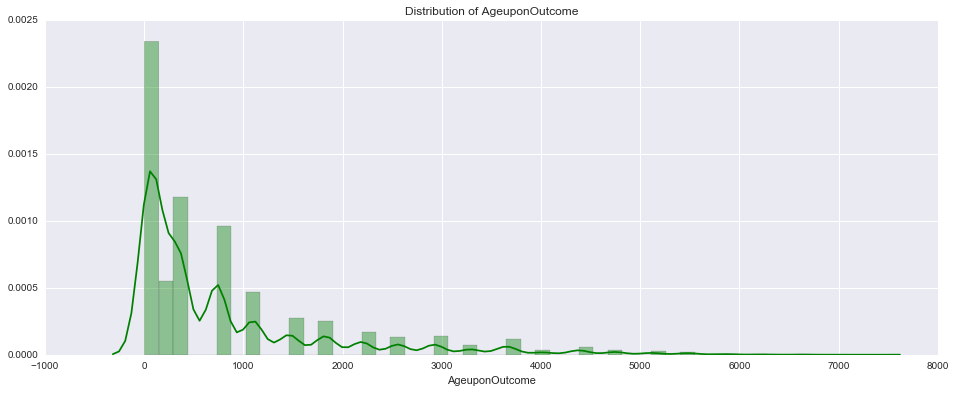

In [29]:
# distrubition of AgeuponOutcome
plt.figure(figsize=(16,6))
sns.distplot(train["AgeuponOutcome"], color='g')
plt.title("Distribution of AgeuponOutcome")

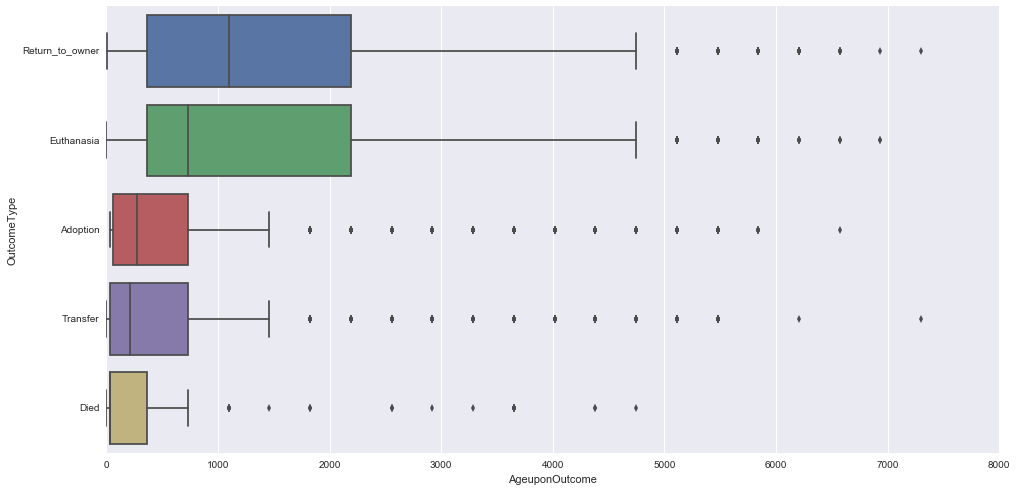

In [33]:
plt.figure(figsize=(16,8))
sns.boxplot(x="AgeuponOutcome", y="OutcomeType", data=train)

Animals who were returned to their owners or euthanasia-ed have larger age. Animals who died have a smaller age possibly due to less medical care.

---
# Sex variable

In [ ]:
# clean SexuponOutcome a little bit
def update_sex(df):
    unique_sex = ['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female', 'Unknown']
    df = df[df["SexuponOutcome"].isin(unique_sex)] # get rid of all other values (i.e. missing)
    df["Sex"] = df["SexuponOutcome"].apply(lambda x: "Male" if x.endswith("Male") else "Female")
    df["SexType"] = df["SexuponOutcome"].apply(lambda x: x.split(" ")[0])
    return df

train = update_sex(train)

In [58]:
# outcome by sex
outcome_by_sex = pd.crosstab(train["OutcomeType"], train["Sex"], margins=True)
outcome_by_sextype = pd.crosstab(train["OutcomeType"], train["SexType"], margins=True)

In [60]:
print("=="*30)
print(outcome_by_sex)
print("=="*30)
print(outcome_by_sextype)
print("=="*30)

Sex              Female   Male    All
OutcomeType                          
Adoption           5389   5380  10769
Died                 99     98    197
Euthanasia          734    821   1555
Return_to_owner    2061   2724   4785
Transfer           5141   4281   9422
All               13424  13304  26728
SexType          Intact  Neutered  Spayed  Unknown    All
OutcomeType                                              
Adoption            361      5222    5186        0  10769
Died                135        19      18       25    197
Euthanasia          878       344     232      101   1555
Return_to_owner     778      2247    1748       12   4785
Transfer           4884      1947    1636      955   9422
All                7036      9779    8820     1093  26728


The outcome of the animal seems independent of the sex. Neutered and spayed animals are likely to be adopted.Intact animals are likely to be transfered.

The y-variable is also highly skewed with ~40% "Adoption" and very few "Died".

---
# Time Variable

In [64]:
# clean time
train.index = pd.to_datetime(train["DateTime"])

In [100]:
def plot(df, gby, title):
    t = df.groupby([gby, "OutcomeType"]).count()["AnimalID"].unstack()
    t = t / t.sum()
    t.plot(subplots=(5,1), figsize=(16,10), title=title)

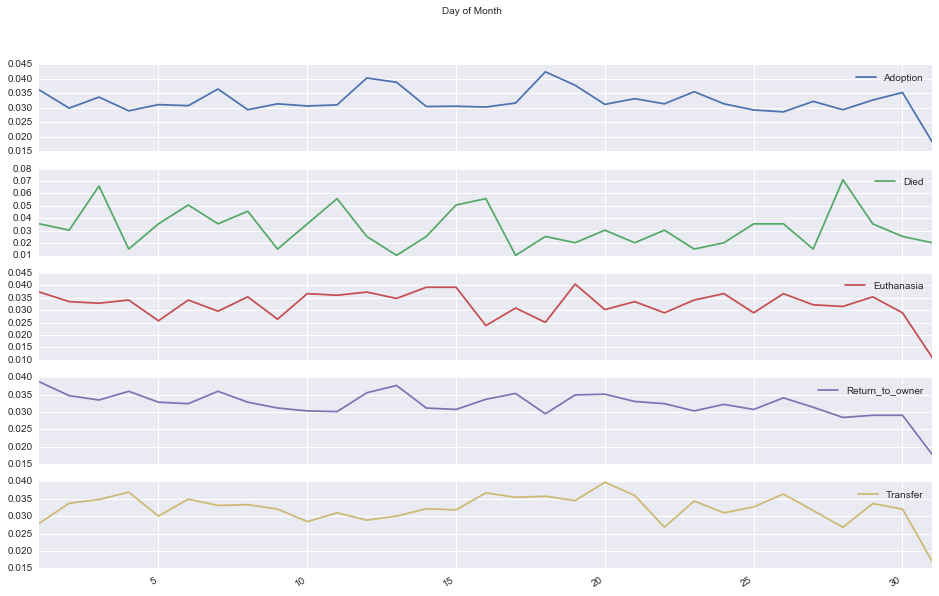

In [101]:
plot(train, train.index.day, "Day of Month")

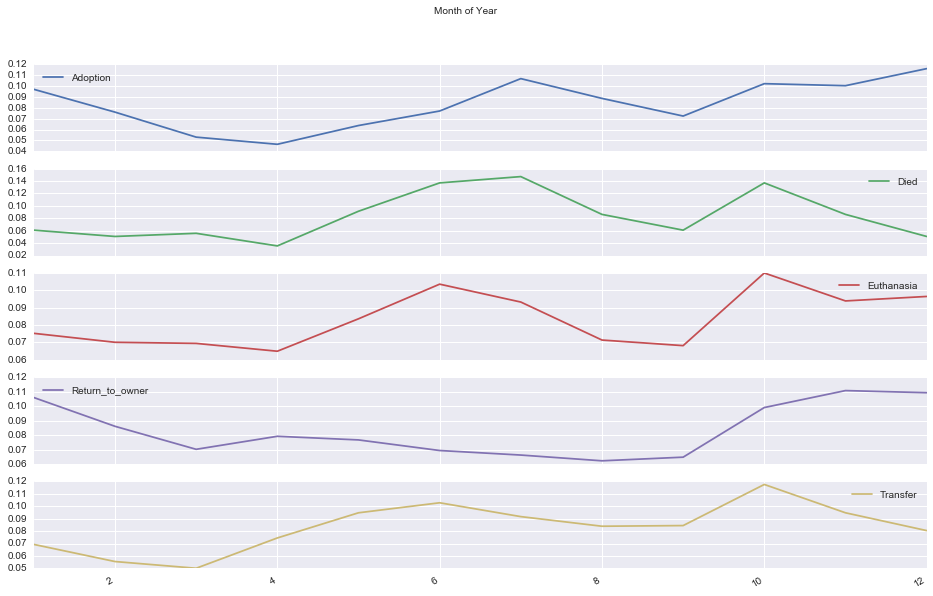

In [102]:
plot(train, train.index.month, "Month of Year")

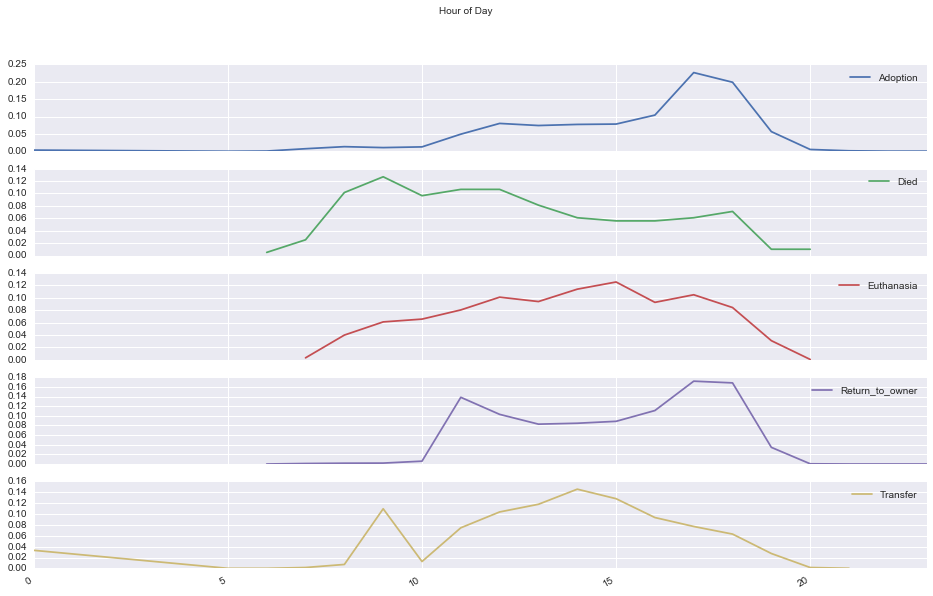

In [103]:
plot(train, train.index.hour, "Hour of Day")

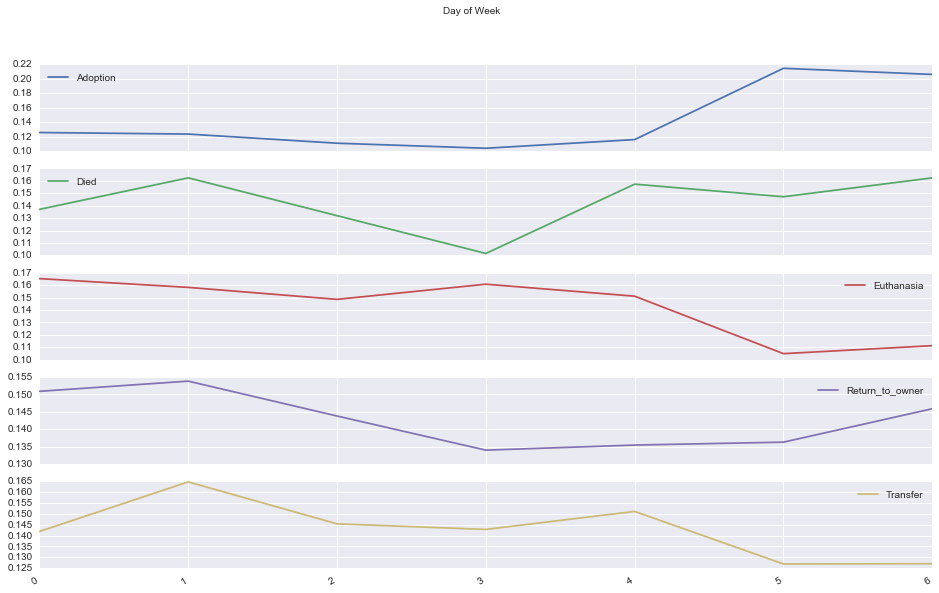

In [104]:
plot(train, train.index.weekday, "Day of Week")

---
# Animal type variable

In [81]:
outcome_by_animal = pd.crosstab(train["OutcomeType"], train["AnimalType"], margins=True)
print(outcome_by_animal)

AnimalType         Cat    Dog    All
OutcomeType                         
Adoption          4272   6497  10769
Died               147     50    197
Euthanasia         710    845   1555
Return_to_owner    500   4285   4785
Transfer          5505   3917   9422
All              11134  15594  26728


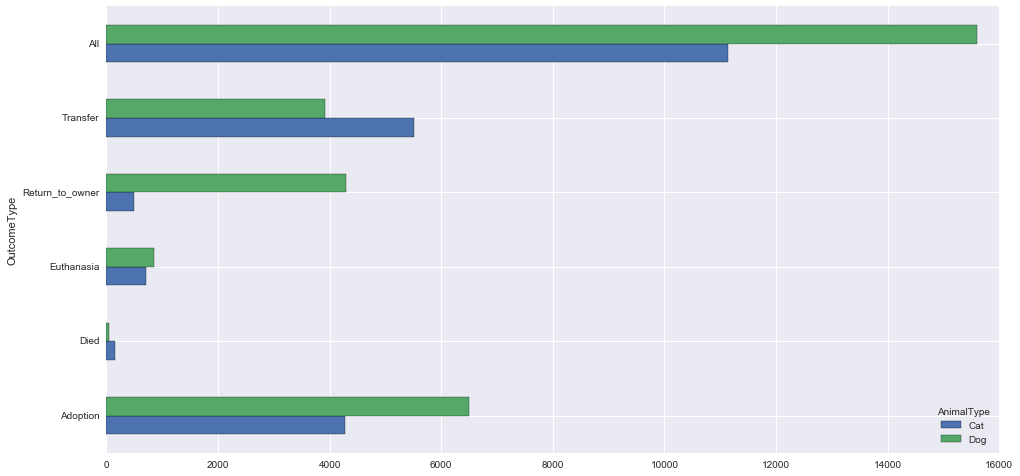

In [108]:
outcome_by_animal[["Cat","Dog"]].plot.barh(figsize=(16,8))

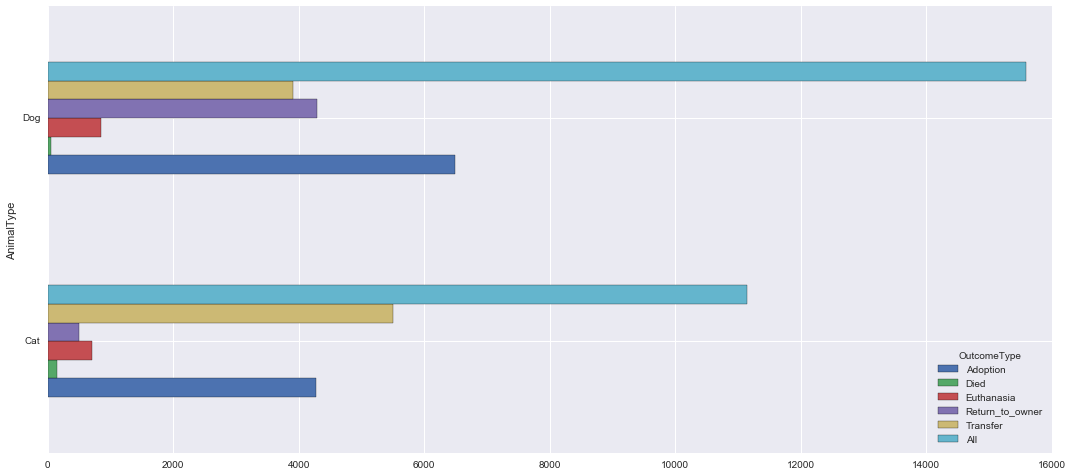

In [116]:
outcome_by_animal[["Cat","Dog"]].T.plot.barh(figsize=(18,8))

## Name variable

In [123]:
# percentage of name missing
train["Name"].isnull().sum() / train.shape[0]

0.28775067345106253

In [134]:
# name missing by outcome type
train["NameMissing"] = train["Name"].isnull()
outcome_by_name_missing = pd.crosstab(train["NameMissing"], train["OutcomeType"], margins=True)
print(outcome_by_name_missing)

OutcomeType  Adoption  Died  Euthanasia  Return_to_owner  Transfer    All
NameMissing                                                              
False            9091    77         740             4632      4497  19037
True             1678   120         815              153      4925   7691
All             10769   197        1555             4785      9422  26728


In [138]:
print(outcome_by_name_missing.div(outcome_by_name_missing["All"], axis=0))

OutcomeType  Adoption      Died  Euthanasia  Return_to_owner  Transfer  All
NameMissing                                                                
False        0.477544  0.004045    0.038872         0.243316  0.236224  1.0
True         0.218177  0.015603    0.105968         0.019893  0.640359  1.0
All          0.402911  0.007371    0.058179         0.179026  0.352514  1.0


Animals with names are more than ~2x likely to be adopted and animals without names are ~3x likely to be transfered, died or euthanasia-ed. 

Animals with names are much much more likely (~12x) to return to their owners than animals without names (possibly no owner before).

In [141]:
# gett has_name and name_length variable
train["name_length"] = train["Name"].apply(lambda x: len(x) if type(x) != float else 0)

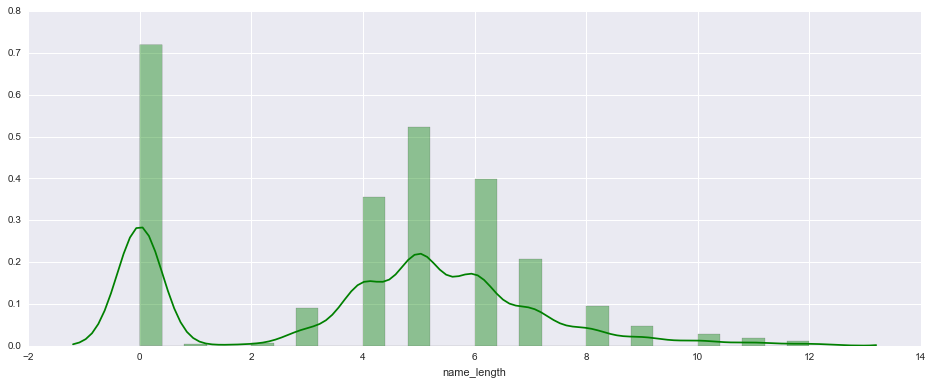

In [147]:
plt.figure(figsize=(16,6))
sns.distplot(train["name_length"],color="g")

In [149]:
pd.crosstab(train["name_length"], train["OutcomeType"], margins=True)

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer,All
name_length,,,,,,
0,1678,120,815,153,4925,7691
1,5,0,1,4,26,36
2,36,0,4,26,15,81
3,433,6,45,276,193,953
4,1757,14,158,1058,801,3788
5,2672,22,208,1352,1322,5576
6,2083,20,161,972,1029,4265
7,1040,7,83,512,562,2204
8,501,5,47,205,266,1024


In [159]:
def get_init(df):
    
    df["initial"] = df["Name"].apply(lambda x: x[0] if type(x) != float else "!")

    df["initial"][df["initial"].str.contains("'")] = "S"
    df["initial"][df["initial"].str.contains("0")] = "J"
    df["initial"][df["initial"].str.contains("3")] = "B"
    df["initial"][df["initial"].str.contains(" ")] = "J"

    # ! for missing name
    # D = {i:j for i,j in zip(list("!ABCDEFGHIJKLMNOPQRSTUVWXYZ"),list(range(27)))}
    # df["initial"] = df["initial"].replace(D)
    
    # df = df.drop("Name",1)
    return df

In [160]:
train = get_init(train)

In [161]:
pd.crosstab(train["initial"], train["OutcomeType"], margins=True)

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer,All
initial,,,,,,
!,1678,120,815,153,4925,7691
A,428,3,35,136,211,813
B,816,7,90,544,408,1865
C,748,6,81,492,386,1713
D,427,4,30,251,198,910
E,212,3,13,72,107,407
F,271,4,16,86,131,508
G,347,3,30,130,159,669
H,314,3,21,120,176,634
